In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%cd /content/drive/MyDrive/YOLO11-Instance-Segmentation-main
%cd /content/drive/MyDrive/YOLO8

/content/drive/MyDrive/YOLO11-Instance-Segmentation-main
/content/drive/MyDrive/YOLO8


In [15]:
!nvidia-smi

Fri Jan  3 15:26:23 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

!pip install Ultralytics

Looking in indexes: https://download.pytorch.org/whl/cu121



0: 640x640 (no detections), 19.6ms
Speed: 3.3ms preprocess, 19.6ms inference, 90.6ms postprocess per image at shape (1, 3, 640, 640)


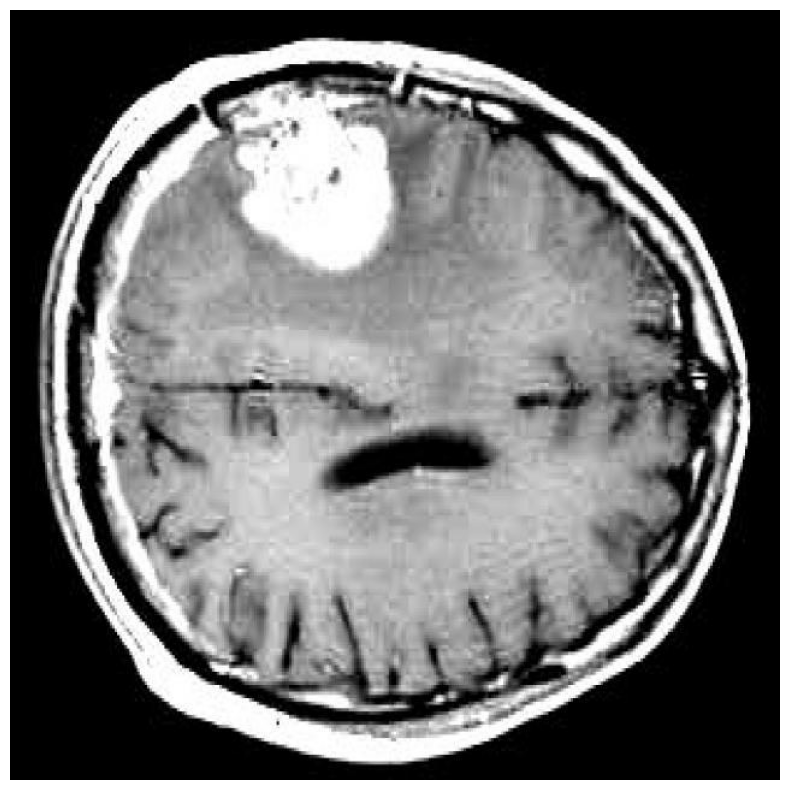

In [18]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLOv8 segmentation model
model = YOLO("yolo11n-seg.pt")  # Replace with your model path if custom

# Load the image
image_path = "/content/drive/MyDrive/YOLO8/train/images/y2_jpg.rf.4fccb062e795c542b7b80a0699808aab.jpg"  # Path to your uploaded image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform segmentation
results = model.predict(source=image, show=False, save=False, conf=0.5)  # Set confidence threshold as needed

# Visualize results
annotated_image = results[0].plot()  # Annotated image with segmentation masks and labels

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis("off")
plt.show()

In [20]:
from ultralytics import YOLO

In [21]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [22]:
from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("iotseecs").project("brain-tumor-yzzav")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BRAIN-TUMOR-1 in yolov11:: 100%|██████████| 1680/1680 [00:13<00:00, 122.01it/s]


In [24]:
# Load a model
model = YOLO("yolo11n-seg.pt")

# Train the model
train_results = model.train(
    data="/content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/data.yaml",  # path to dataset YAML
    epochs=10,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

100%|██████████| 755k/755k [00:00<00:00, 21.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/train/labels.cache... 583 images, 2 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/valid/labels.cache... 123 images, 1 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/segment/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train8
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.97G      1.102       2.55      3.102      1.338          7        640: 100%|██████████| 37/37 [01:22<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        123        126          1      0.217        0.7      0.465          1      0.217      0.717       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.95G      1.111       1.92      2.129      1.279          7        640: 100%|██████████| 37/37 [00:16<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        123        126      0.751      0.597      0.744      0.438      0.761      0.605      0.759      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.95G      1.134      1.815      1.781      1.273          7        640: 100%|██████████| 37/37 [00:15<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        123        126      0.714      0.563      0.668      0.387      0.696      0.548      0.621      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.95G      1.096      1.775       1.58      1.275          7        640: 100%|██████████| 37/37 [00:16<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        123        126       0.75      0.764      0.804      0.551      0.817       0.64       0.69      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.95G      1.054      1.661      1.282      1.208          7        640: 100%|██████████| 37/37 [00:16<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        123        126      0.919      0.895      0.946      0.659      0.919      0.895      0.905      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.94G     0.9678      1.595      1.096      1.151          8        640: 100%|██████████| 37/37 [00:16<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        123        126      0.913       0.92      0.947      0.685      0.921      0.928      0.968      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.94G      0.939      1.525     0.9663      1.144          8        640: 100%|██████████| 37/37 [00:16<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        123        126      0.958      0.915      0.972      0.718      0.958      0.915      0.972      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.95G     0.8839      1.415     0.8495      1.122          7        640: 100%|██████████| 37/37 [00:15<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        123        126      0.982       0.96      0.983       0.75      0.982       0.96      0.989      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.95G     0.8647      1.361     0.7883      1.083          8        640: 100%|██████████| 37/37 [00:16<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        123        126      0.984      0.984      0.986      0.748      0.984      0.984      0.986      0.729



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.94G     0.7789      1.269     0.7348      1.054          7        640: 100%|██████████| 37/37 [00:15<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        123        126      0.982      0.976      0.986      0.769      0.982      0.976      0.986      0.755



10 epochs completed in 0.074 hours.
Optimizer stripped from runs/segment/train8/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train8/weights/best.pt, 6.0MB

Validating runs/segment/train8/weights/best.pt...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]


                   all        123        126      0.982      0.976      0.986       0.77      0.982      0.976      0.986      0.757
Speed: 0.5ms preprocess, 5.4ms inference, 0.0ms loss, 9.1ms postprocess per image
Results saved to runs/segment/train8


In [28]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/data.yaml",  # path to dataset YAML
    epochs=20,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/train/labels.cache... 583 images, 2 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/YOLO11-Instance-Segmentation-main/BRAIN-TUMOR-1/valid/labels.cache... 123 images, 1 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.48G      1.126      2.707      1.306          9        640: 100%|██████████| 37/37 [00:26<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        123        126          1      0.193      0.668      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.37G      1.153      1.858      1.273         17        640: 100%|██████████| 37/37 [00:15<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        123        126      0.806      0.746      0.851      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.38G      1.153      1.697      1.296         16        640: 100%|██████████| 37/37 [00:16<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        123        126      0.808      0.754      0.848      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.37G      1.135      1.515      1.281         10        640: 100%|██████████| 37/37 [00:16<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        123        126      0.524      0.524      0.474      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.37G      1.127      1.388      1.281         18        640: 100%|██████████| 37/37 [00:16<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        123        126      0.775      0.818      0.849      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.36G      1.107       1.24       1.24         17        640: 100%|██████████| 37/37 [00:15<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        123        126      0.809      0.775      0.873      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.37G      1.102      1.133      1.245         12        640: 100%|██████████| 37/37 [00:15<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        123        126      0.887      0.897      0.958      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.37G       1.05      1.068      1.228         14        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        123        126      0.918      0.889      0.948      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.38G      1.014      0.967      1.203         12        640: 100%|██████████| 37/37 [00:13<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        123        126       0.95      0.952      0.964      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.37G      1.018     0.9439      1.191         12        640: 100%|██████████| 37/37 [00:12<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        123        126      0.917      0.971       0.98      0.711


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.43G     0.9131     0.8448      1.165          7        640: 100%|██████████| 37/37 [00:15<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        123        126      0.869      0.929      0.953      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.36G     0.8909     0.7557      1.149          7        640: 100%|██████████| 37/37 [00:12<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        123        126      0.945      0.949      0.969      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.37G      0.892     0.6981      1.158          8        640: 100%|██████████| 37/37 [00:13<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        123        126      0.953      0.958      0.983      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.36G     0.8648     0.6395      1.138          8        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        123        126      0.968      0.976       0.99       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.36G     0.8224     0.6114      1.124          8        640: 100%|██████████| 37/37 [00:15<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        123        126      0.984      0.976      0.989      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.36G     0.7743     0.5537      1.078          7        640: 100%|██████████| 37/37 [00:15<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        123        126      0.983      0.984      0.988      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.37G     0.7742     0.5357      1.074          7        640: 100%|██████████| 37/37 [00:14<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        123        126      0.991      0.968      0.993      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.36G     0.7723     0.5255      1.077          7        640: 100%|██████████| 37/37 [00:11<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        123        126      0.976      0.976      0.993      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.36G     0.7161     0.4938      1.038          7        640: 100%|██████████| 37/37 [00:12<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        123        126      0.976      0.982      0.993      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.36G     0.7122     0.4847       1.04          7        640: 100%|██████████| 37/37 [00:12<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        123        126      0.982      0.984      0.994       0.77



20 epochs completed in 0.104 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 5.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


                   all        123        126      0.982      0.984      0.994      0.769
Speed: 0.3ms preprocess, 4.5ms inference, 0.1ms loss, 7.6ms postprocess per image
Results saved to runs/detect/train4



image 1/1 /content/drive/MyDrive/YOLO11-Instance-Segmentation-main/test_images/2.jpg: 640x640 1 clock, 19.0ms
Speed: 2.0ms preprocess, 19.0ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict4


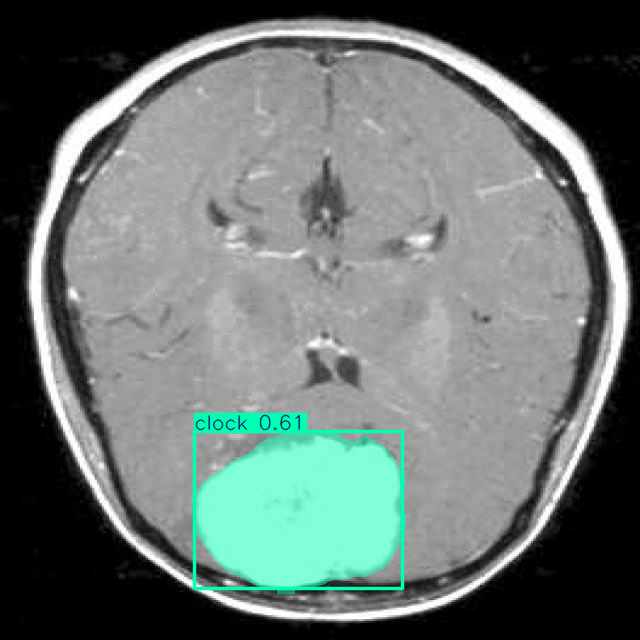

In [40]:
from ultralytics import YOLO

# Load the model with a specified task
model = YOLO("/content/drive/MyDrive/YOLO11-Instance-Segmentation-main/yolo11n-seg.pt", task='detect')

# Perform object detection on an image
results = model("/content/drive/MyDrive/YOLO11-Instance-Segmentation-main/test_images/2.jpg", save=True)
results[0].show()

In [45]:
from ultralytics import YOLO
from ultralytics import SAM

# Load the YOLO model
yolo_model = YOLO("/content/drive/MyDrive/YOLO11-Instance-Segmentation-main/yolo11n-seg.pt")  # pretrained YOLO model

# Run batched inference on a list of images
results = yolo_model("/content/drive/MyDrive/YOLO11-Instance-Segmentation-main/test_images/2.jpg")  # return a list of Results objects

# Load the SAM model
sam_model = SAM("sam2_b.pt")

for result in results:
     class_ids = result.boxes.cls.int().tolist()  # noqa
     if len(class_ids):
         boxes = result.boxes.xyxy  # Boxes object for bbox outputs
         sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, save=True, device=0)


image 1/1 /content/drive/MyDrive/YOLO11-Instance-Segmentation-main/test_images/2.jpg: 640x640 1 clock, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict7
